# DBSCAN CLUSTERING


Chocolate Bar Ratings

Expert ratings of over 1,700 chocolate bars


About this Dataset
Context
Chocolate is one of the most popular candies in the world. Each year, residents of the United States collectively eat more than 2.8 billions pounds. However, not all chocolate bars are created equal! This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown.


Flavors of Cacao Rating System:
5= Elite (Transcending beyond the ordinary limits)
4= Premium (Superior flavor development, character and style)
3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
2= Disappointing (Passable but contains at least one significant flaw)
1= Unpleasant (mostly unpalatable)

Each chocolate is evaluated from a combination of both objective qualities and subjective interpretation. A rating here only represents an experience with one bar from one batch. Batch numbers, vintages and review dates are included in the database when known.

The database is narrowly focused on plain dark chocolate with an aim of appreciating the flavors of the cacao when made into chocolate. The ratings do not reflect health benefits, social missions, or organic status.

Flavor is the most important component of the Flavors of Cacao ratings. Diversity, balance, intensity and purity of flavors are all considered. It is possible for a straight forward single note chocolate to rate as high as a complex flavor profile that changes throughout. Genetics, terroir, post harvest techniques, processing and storage can all be discussed when considering the flavor component.

Texture has a great impact on the overall experience and it is also possible for texture related issues to impact flavor. It is a good way to evaluate the makers vision, attention to detail and level of proficiency.

Aftermelt is the experience after the chocolate has melted. Higher quality chocolate will linger and be long lasting and enjoyable. Since the aftermelt is the last impression you get from the chocolate, it receives equal importance in the overall rating.

Overall Opinion is really where the ratings reflect a subjective opinion. Ideally it is my evaluation of whether or not the components above worked together and an opinion on the flavor development, character and style. It is also here where each chocolate can usually be summarized by the most prominent impressions that you would remember about each chocolate.

Acknowledgements
These ratings were compiled by Brady Brelinski, Founding Member of the Manhattan Chocolate Society. For up-to-date information, as well as additional content (including interviews with craft chocolate makers), please see his website: Flavors of Cacao

Inspiration
Where are the best cocoa beans grown?
Which countries produce the highest-rated bars?
What’s the relationship between cocoa solids percentage and rating?

In [ ]:
#EDA- Exploratory Data Analysis

1.Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.

2.Univariable study. We'll just focus on the dependent variable and try to know a little bit more about it.

3.Multivariate study. We'll try to understand how the dependent variable and independent variables relate.

4.Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.

5.Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [36]:
url='https://raw.githubusercontent.com/UBC-MDS/DSCI_522-Chocolate_Ratings_Analysis/master/data/flavors_of_cacao.csv'
#Read Data
df_train=pd.read_csv(url,sep=",", header=0,na_values='\xa0')

In [37]:
df_train.head(10)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,NaN,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,NaN,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,NaN,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,NaN,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,NaN,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,NaN,Peru


In [38]:
#sanity check
df_train.isnull().sum()

Company \n(Maker-if known)             0
Specific Bean Origin\nor Bar Name      0
REF                                    0
Review\nDate                           0
Cocoa\nPercent                         0
Company\nLocation                      0
Rating                                 0
Bean\nType                           888
Broad Bean\nOrigin                    74
dtype: int64

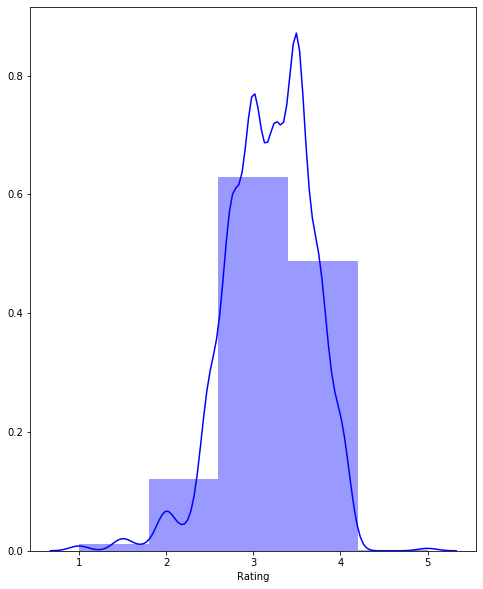

In [40]:
#Analysing the Numerical variable
plt.figure(figsize=(8,10))
sns.distplot(df_train['Rating'],bins=5,color='blue')

Inference:

    3&4 have high number of ratings
    2 - a few ratings
    1&5- very less ratings

In [41]:
#extracting coca percentage

df_train['Cocoa % as num'] = df_train['Cocoa\nPercent'].apply(lambda x: x.split('%')[0])
df_train['Cocoa % as num'] = df_train['Cocoa % as num'].astype(float)

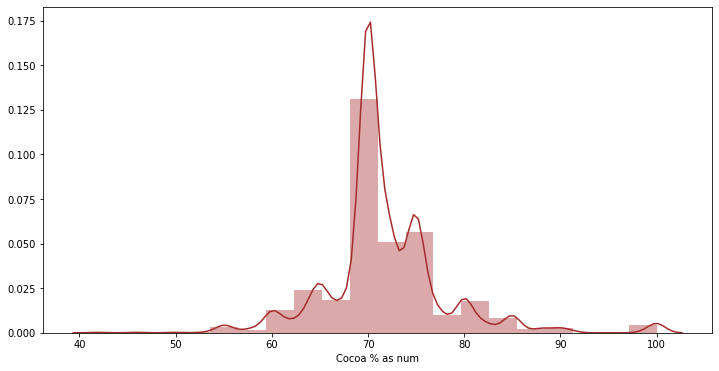

In [42]:
plt.figure(figsize=(12,6))
sns.distplot(df_train['Cocoa % as num'],bins=20,color='Brown')

Inference:
    
    Normally distributed , majority at 70% of cocoa

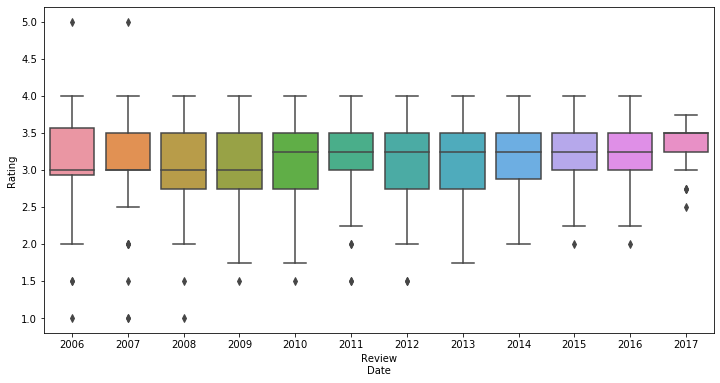

In [43]:
#ratings by review year to see if the review date has an effect on rating

df_train['Review\nDate'] = df_train['Review\nDate'].astype(str)

plt.figure(figsize=(12,6))
sns.boxplot(x='Review\nDate', y='Rating',data=df_train)

Inference:
    
    From 2006 to 2009 median rating is around 3.0
    From 2010 to 2016 median rating is around 3.3
    

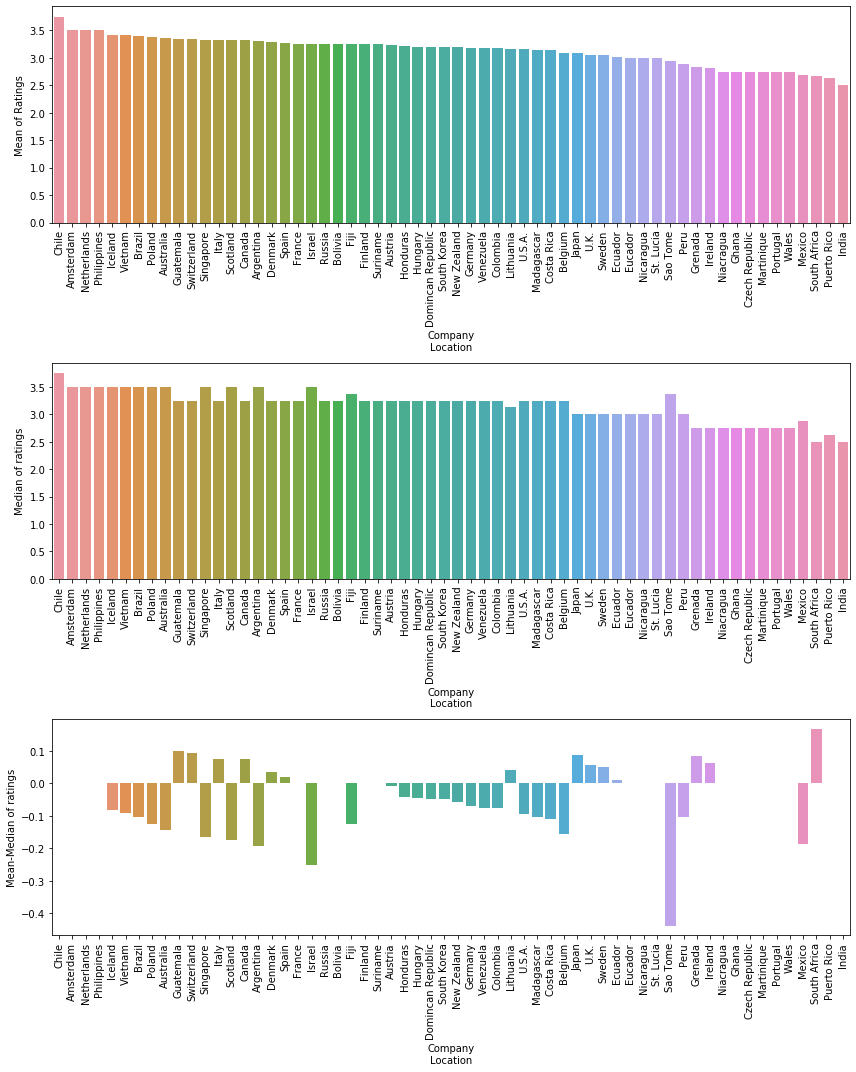

In [45]:
# plotting Mean of ratings , Median of ratings , Mean-Median of ratings
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,figsize=(12,15))

#finding mean of ratings
a = df_train.groupby(['Company\nLocation'])['Rating'].mean()
a = a.sort_values(ascending=False)

#Finding median of rating
b = df_train.groupby(['Company\nLocation'])['Rating'].median()
b = b.sort_values(ascending=False)

a = pd.DataFrame(a)
b = pd.DataFrame(b)

Ratings_by_location = a.join(b, how='left',lsuffix='_mean', rsuffix='_median')
Ratings_by_location['Mean-Median'] = Ratings_by_location['Rating_mean']-Ratings_by_location['Rating_median']
Rating_difference = sns.barplot(x=Ratings_by_location.index,y=Ratings_by_location['Mean-Median'], ax = ax3)
Rating_difference.set_xticklabels(labels = Ratings_by_location.index, rotation =90)
Rating_difference.set_ylabel("Mean-Median of ratings")

#plt.figure(figsize=(12,6))
ratings_mean = sns.barplot(x=Ratings_by_location.index,y=Ratings_by_location['Rating_mean'],ax=ax1)
ratings_mean.set_xticklabels(labels = Ratings_by_location.index, rotation =90)
ratings_mean.set_ylabel("Mean of Ratings")

#plt.figure(figsize=(12,6))
ratings_median = sns.barplot(x=Ratings_by_location.index,y=Ratings_by_location['Rating_median'], ax = ax2)
ratings_median.set_xticklabels(labels = Ratings_by_location.index, rotation =90)
ratings_median.set_ylabel("Median of ratings")

plt.tight_layout()

Inference:

    From visualization we can infer that there is no such difference between mean and median except for the location sao Tome.
    Rating seems to be independent of country.


[Text(0, 0, 'Sao Tome'),
 Text(0, 0, 'Wales'),
 Text(0, 0, 'Ghana'),
 Text(0, 0, 'Ireland'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Eucador'),
 Text(0, 0, 'Fiji'),
 Text(0, 0, 'Honduras'),
 Text(0, 0, 'Niacragua'),
 Text(0, 0, 'Vietnam'),
 Text(0, 0, 'U.K.'),
 Text(0, 0, 'New Zealand'),
 Text(0, 0, 'Argentina'),
 Text(0, 0, 'Amsterdam'),
 Text(0, 0, 'Scotland'),
 Text(0, 0, 'Bolivia'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Ecuador'),
 Text(0, 0, 'Lithuania'),
 Text(0, 0, 'Hungary'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'Nicaragua'),
 Text(0, 0, 'Costa Rica'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Madagascar'),
 Text(0, 0, 'France'),
 Text(0, 0, 'U.S.A.'),
 Text(0, 0, 'Mexico'),
 Text(0, 0, 'Puerto Rico'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Grenada'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'South Africa'),
 Text(0, 0, 'Israel'),
 Text(0, 0, 'Finland'),
 Text(0, 0, 'Sweden'),


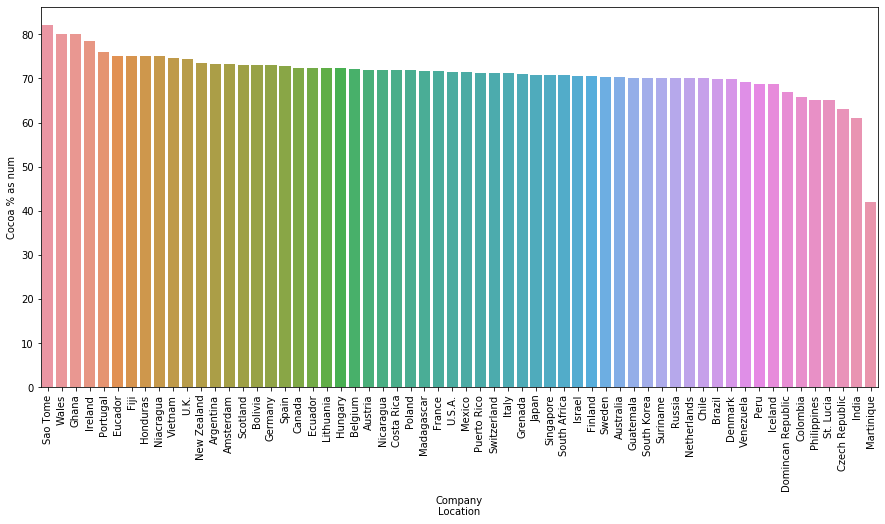

In [49]:
#Coco percentage in chocolates in different countries

plt.figure(figsize=(15,7))

c=df_train.groupby(['Company\nLocation'])['Cocoa % as num'].mean()
c=c.sort_values(ascending=False)

ratings = sns.barplot(x=c.index,y=c)
ratings.set_xticklabels(labels = c.index, rotation =90)

Inference:
    
    The distribution varied from 40% to 80% in our data set

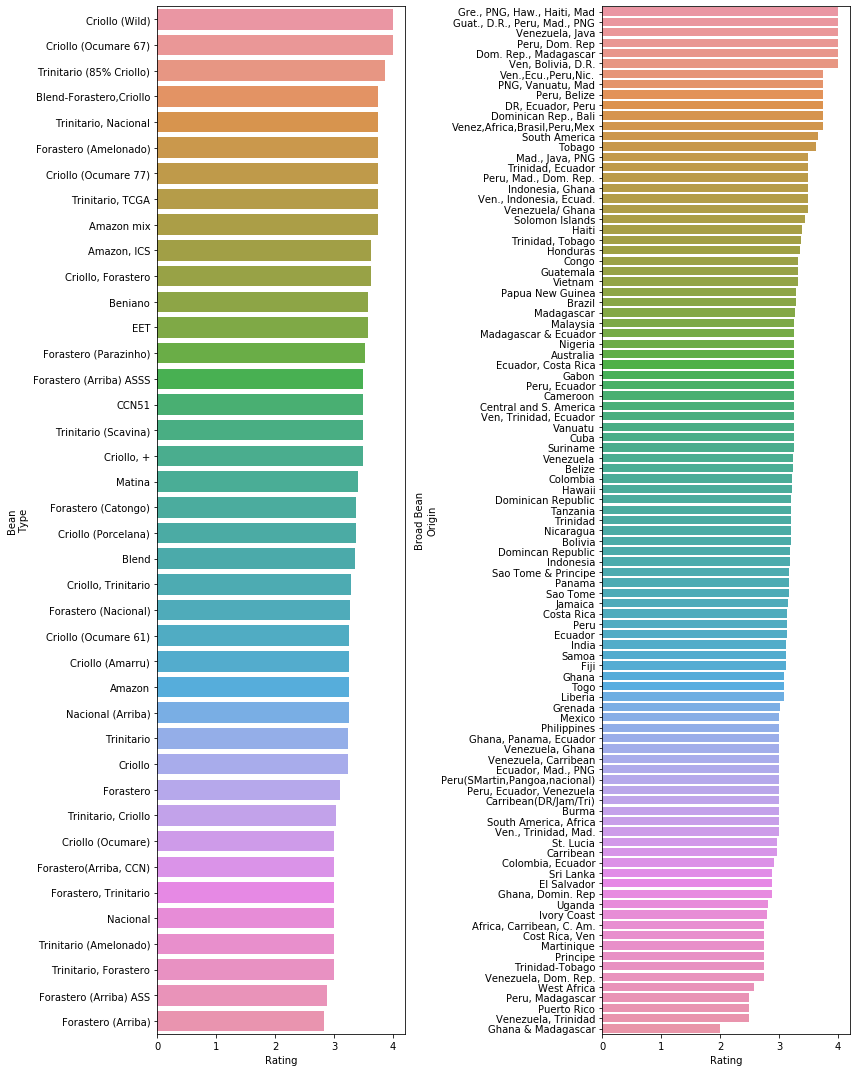

In [51]:
#Beantype vs rating , Broad Bean origin vs rating

fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,15))

e = df_train.groupby(['Bean\nType'])['Rating'].mean()
e = e.sort_values(ascending=False)
Rating_beanType = sns.barplot(y=e.index,x=e,ax = ax1)


f = df_train.groupby(['Broad Bean\nOrigin'])['Rating'].mean()
f = f.sort_values(ascending=False)
Rating_broadbean = sns.barplot(y=f.index,x=f,ax = ax2)

plt.tight_layout()

Inference:
    
    Trying to identify anomalies using DBscan algorithm
    We have chosen Cocoa percentage, Review date, Rating, Broad bean origin, Company location to be included in the training data for our clustering model.

    The clustering technique we will be using is DBScan

    Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996. It is a density-based clustering algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature.

In [56]:
df1 = df_train[['Cocoa % as num','Rating','Review\nDate']]

In [57]:
#non_numerical_columns = ['Review\nDate','Bean\nType', 'Broad Bean\nOrigin','Company\nLocation']

non_numerical_columns = ['Review\nDate']

for i in non_numerical_columns:
    x1 = pd.get_dummies(df1[i])
    df1 = df1.join(x1,lsuffix='_l',rsuffix='_r')
    df1.drop(i,axis=1,inplace=True)

In [58]:

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler



In [59]:
#Standardizing cluster
df_num = StandardScaler().fit_transform(df1)

In [61]:
A = []
B = []
C = []

for i in np.linspace(0.1,5,50):
    db = DBSCAN(eps=i, min_samples=10).fit(df_num)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    sum = 0
    for t in labels:
        if t == -1: 
            sum = sum + 1
    C.append(sum)
            
    
    
    A.append(i)
    B.append(int(n_clusters_))

labels are the label of the clusters. If the label is -1, then the observation is an outlier/noise within our dataset.

db.core_sampleindices are the indices of the core points in the cluster, the indices that are excluded here are of outliers and the edges of the clusters

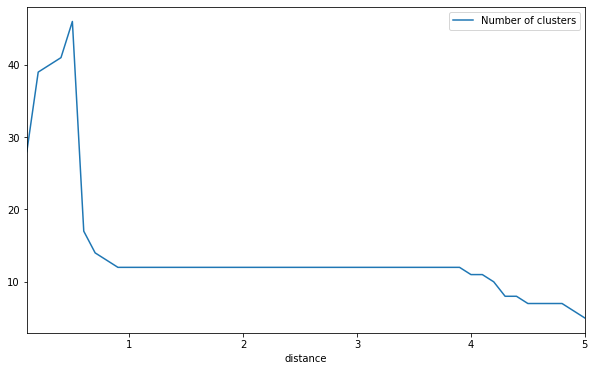

In [62]:
results = pd.DataFrame([A,B,C]).T
results.columns = ['distance','Number of clusters','Number of outliers']
results.plot(x='distance',y='Number of clusters',figsize=(10,6))

Based on the above plot,  decided to go forward with a distance (epsilon) value of 1

In [63]:
#Implement DBScan

db = DBSCAN(eps=1, min_samples=10).fit(df_num)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

12

Inference: 
    
    Number of outliers is 12 , number of clusters does not include this.
    

In [66]:
df_train = df_train.join(pd.DataFrame(labels))
df_train = df_train.rename(columns={0:'Cluster'})

df_train['Cluster'].value_counts()

 1     283
 2     245
 0     217
 4     189
 3     171
 5     155
 6     116
 7     104
-1      93
 9      81
 10     65
 11     56
 8      20
Name: Cluster, dtype: int64

-1 stands for outliers/Noise, we see that there are 93 outliers in our dataset.

The number of observations in our clusters range from 20 to 283.

In [68]:
#Statistics of cluster
df_clusters = df_train.groupby('Cluster')['Rating','Cocoa % as num']
df_clusters.describe()

Rating                                                      \
         count      mean       std   min     25%   50%   75%   max   
Cluster                                                              
-1        93.0  2.403226  0.773220  1.00  2.0000  2.25  3.00  5.00   
 0       217.0  3.233871  0.412863  2.25  3.0000  3.25  3.50  4.00   
 1       283.0  3.248233  0.381877  2.00  3.0000  3.25  3.50  4.00   
 2       245.0  3.195918  0.408521  2.25  3.0000  3.25  3.50  4.00   
 3       171.0  3.230994  0.418335  2.25  3.0000  3.25  3.50  4.00   
 4       189.0  3.203704  0.449778  2.00  2.7500  3.25  3.50  4.00   
 5       155.0  3.309677  0.424574  2.25  3.0000  3.25  3.50  4.00   
 6       116.0  3.135776  0.377912  2.50  2.9375  3.00  3.50  4.00   
 7       104.0  3.192308  0.397551  2.25  3.0000  3.25  3.50  4.00   
 8        20.0  3.437500  0.179088  3.00  3.2500  3.50  3.50  3.75   
 9        81.0  3.095679  0.428602  2.50  2.7500  3.00  3.50  4.00   
 10       65.0  3.307692  0.473454  2.50  3.0000  3.25  3.75  4.00   
 11       56.0  3.392857  0.456909  2.50  3.0000  3.50  4.00  4.00   

        Cocoa % as num                                                        
                 count       mean        std   min    25%   50%   75%    max  
Cluster                                                                       
-1                93.0  78.236559  16.338404  42.0  68.00  75.0  91.0  100.0  
 0               217.0  71.672811   5.147711  60.0  70.00  70.0  75.0   90.0  
 1               283.0  71.816254   4.717722  57.0  70.00  70.0  75.0   88.0  
 2               245.0  72.210204   4.784891  60.0  70.00  70.0  75.0   90.0  
 3               171.0  70.847953   5.303743  55.0  70.00  70.0  74.0   90.0  
 4               189.0  71.264550   4.681773  58.0  70.00  70.0  73.0   85.0  
 5               155.0  70.896774   4.606847  56.0  70.00  70.0  73.0   85.0  
 6               116.0  69.909483   6.132096  55.0  66.75  70.0  75.0   85.0  
 7               104.0  70.966346   5.221438  55.0  70.00  71.0  75.0   85.0  
 8                20.0  71.750000   2.899637  70.0  70.00  70.0  73.0   80.0  
 9                81.0  72.160494   5.838358  60.0  70.00  70.0  75.0   88.0  
 10               65.0  70.107692   4.224642  60.0  67.00  70.0  73.0   77.0  
 11               56.0  70.607143   4.807867  60.0  65.75  71.5  75.0   80.0

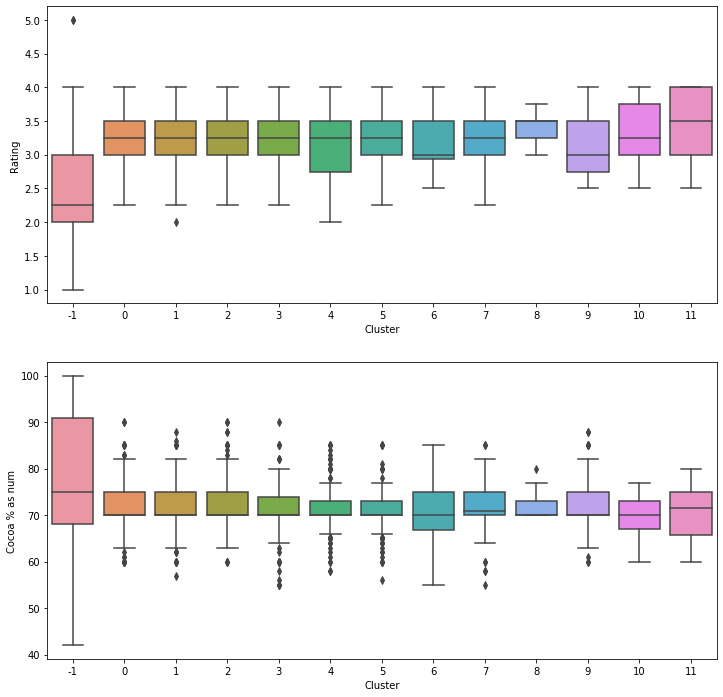

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [70]:
fig, (ax1,ax2) = plt.subplots(nrows = 2,figsize=(12,12))

plt.figure(figsize=(12,8))
plot1 = sns.boxplot(x=df_train['Cluster'],y=df_train['Rating'],data=df_train, ax = ax1)


plt.figure(figsize=(12,8))
plot2 = sns.boxplot(x=df_train['Cluster'],y=df_train['Cocoa % as num'],data=df_train, ax= ax2)

Inference:

    We can infer from the above plots that the rating as well as the Cocoa percentage is much different for our outliers from the remaining clusters within the dataset.

    A high Cocoa percentage in a chocolate doesn't necessarily prompt higher ratings, looks like it actually worsens the ratings from our dataset.

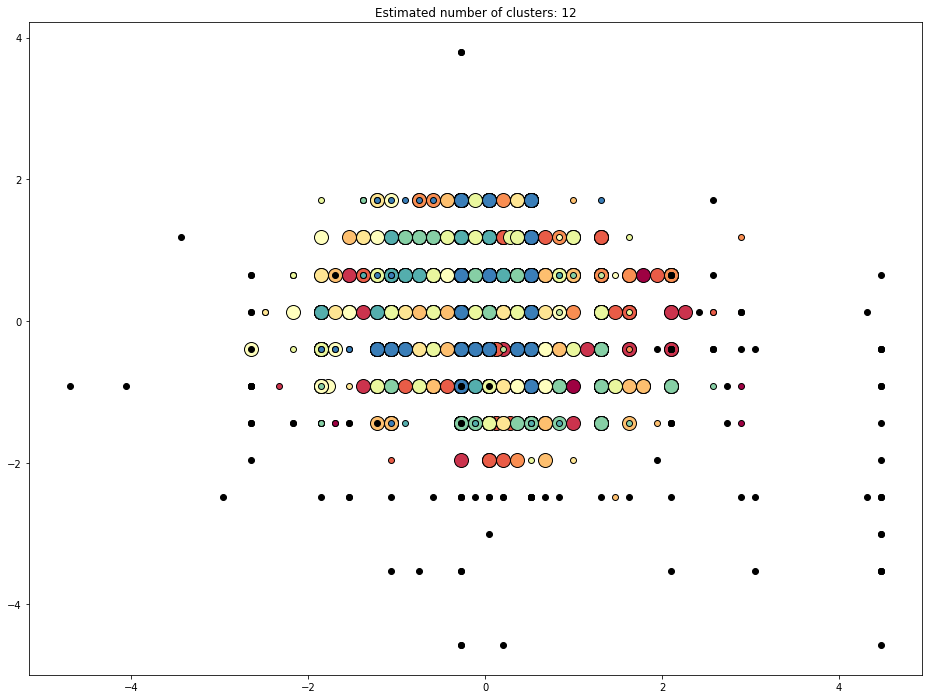

In [71]:
plt.figure(figsize=(16,12))
X = df_num

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

The black markers in the above dataset is the noise/outliers in our dataset.